In [141]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import os
from tensorflow.keras.callbacks import TensorBoard


In [142]:
path= "Cifar-tensorboard"
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(path),histogram_freq=1,profile_batch = 100000000)

cifar = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)= cifar.load_data()
#x_train = x_train.reshape(6000000,28,28,1)
#x_test = x_test.reshape(1000000,28,28,1)
#x_train /= 255
#x_test /= 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print("vdvdfvd")

vdvdfvd


In [143]:
## Normalizing
import numpy as np
mean= np.mean(x_train,axis=(0,1,2,3))
std= np.std(x_train,axis=(0,1,2,3))
x_train=(x_train-mean)/(std + 1e-7)
x_test=(x_test-mean)/(std+ 1e-7)


In [144]:
from keras.utils import np_utils

In [145]:
# number of classes and onehot encoding
nClasses =10
y_train = np_utils.to_categorical(y_train,nClasses)
y_test = np_utils.to_categorical(y_test,nClasses)
print(x_train.shape)
print(y_train.shape)


(50000, 32, 32, 3)
(50000, 10)


In [146]:
input_shape = (32,32,3)
##x_test = np.reshape(x_test,(10000,3072))
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

#x_train /= 255
#x_test /= 255

In [147]:
model = tf.keras.models.Sequential()

In [148]:
def createModel():
    model.add(tf.keras.layers.Conv2D(32,(3,3), padding= 'same', activation= 'relu',input_shape = input_shape))
    model.add(tf.keras.layers.Conv2D(32,(3,3), activation= 'relu')) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(64,(3,3), padding= 'same', activation= 'relu'))
    model.add(tf.keras.layers.Conv2D(64,(3,3), activation= 'relu')) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(64,(3,3), padding= 'same', activation= 'relu'))
    model.add(tf.keras.layers.Conv2D(64,(3,3), activation= 'relu')) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.4))

    # as output of maxpooling is not one D so we Flattern the layer

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(nClasses,activation='softmax'))
    return model

In [149]:
tf.keras.backend.clear_session()
model = createModel()

In [150]:
## Optimizer define
AdamOpt = tf.keras.optimizers.Adam(lr = 0.001)

In [151]:
model.compile(loss='categorical_crossentropy', optimizer= AdamOpt ,metrics=['accuracy'])

In [152]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [153]:
# For better Training presentation
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(epoch%5==0):
            print("just finished epoch", epoch)
            print("***************************")
            print("loss evaluation", logs.get('val_loss'))
            print("Accuracy reached train is ", logs.get('acc'))
            print("Accuracy reached val is ", logs.get('val_acc'))
            return 
            

In [154]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [155]:
batch_size = 256
epochs = 10
##CC= CustomCallback()
model.fit(x_train,y_train,batch_size = batch_size, epochs = 2,callbacks =[tensorboard])

Train on 50000 samples
Epoch 1/2
50000/50000 [==============================] - 145s 3ms/sample - loss: 1.8518 - accuracy: 0.3046
Epoch 2/2
50000/50000 [==============================] - 146s 3ms/sample - loss: 1.4124 - accuracy: 0.4808


In [156]:
## Now check the loss and Accuracy with test data
val_loss, val_accu = model.evaluate(x_test,y_test)
print(val_loss,val_accu)

10000/10000 [==============================] - 8s 791us/sample - loss: 1.1972 - accuracy: 0.5691
1.197162679862976 0.5691


In [157]:
## now if we want to make the prediction from new models but it will show predicted number as array

prediction= model.predict(x_test)
print(prediction)

[[2.13410649e-02 1.94176324e-02 7.56007582e-02 ... 3.15976813e-02
  3.29449363e-02 2.54678037e-02]
 [2.44181633e-01 1.94191262e-01 3.18412180e-03 ... 3.12584569e-04
  5.09924710e-01 4.61516492e-02]
 [2.80466944e-01 1.14207797e-01 2.76404675e-02 ... 5.33436285e-03
  4.93457794e-01 5.39161451e-02]
 ...
 [7.10899616e-03 1.16236589e-03 7.74419010e-02 ... 1.65220991e-01
  1.82930450e-03 3.08874343e-03]
 [1.17286302e-01 1.56187013e-01 1.49298280e-01 ... 1.04619950e-01
  1.29720755e-02 2.15044841e-02]
 [1.03214500e-03 2.38878260e-04 1.03558656e-02 ... 8.50536466e-01
  1.41052669e-05 9.34149721e-04]]


In [158]:
## to covert the array into number to show the result we need to use numpy
import numpy as np

In [159]:
## will predict the element like x_test[5] here, and print the prediction result as 6, so we can see in the below code is 6 label is given to Frog
print(np.argmax(prediction[5]))

6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


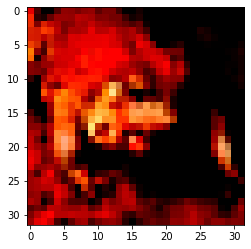

In [160]:
## now lets check what is there at x_test[5] postion. For correct prediction, it must be Frog. 

plt.imshow(x_test[5],cmap='gray')

In [ ]:
## These are the labels are name of classes of each image

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck